# Simulation study for Landweber
- dependence on condition number
- boxplot early stopping rules
- boxplot empirical error weak and strong

In [31]:
import EarlyStopping as es
import numpy as np
import matplotlib.pyplot as plt
import random
random.seed(42)

## Generate diagonal examples

In [7]:
# Create diagonal design matrices
D = 10000
indices = np.arange(D)+1
design_matrix = np.diag(1/(np.sqrt(indices)))
print(design_matrix)

[[1.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.70710678 0.         ... 0.         0.         0.        ]
 [0.         0.         0.57735027 ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.010001   0.         0.        ]
 [0.         0.         0.         ... 0.         0.0100005  0.        ]
 [0.         0.         0.         ... 0.         0.         0.01      ]]


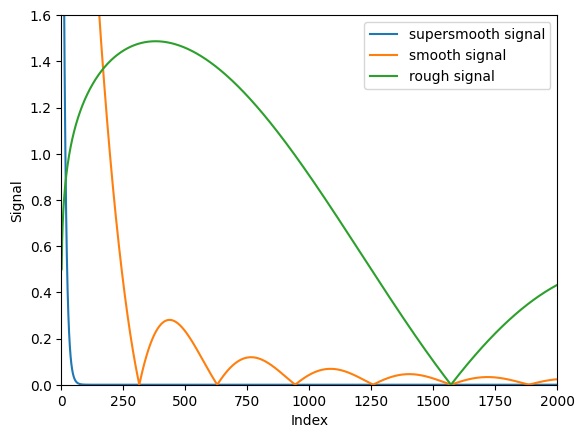

In [33]:
# Create signals from Stankewitz (2020)
signal_supersmooth = 5*np.exp(-0.1*indices)
signal_smooth = 5000*np.abs(np.sin(0.01*indices))*indices**(-1.6)
signal_rough = 250*np.abs(np.sin(0.002*indices))*indices**(-0.8)

# xlabel="Index", ylabel="Coefficient"
plt.plot(indices, signal_supersmooth, label="supersmooth signal")
plt.plot(indices, signal_smooth, label="smooth signal")
plt.plot(indices, signal_rough, label="rough signal")
plt.ylabel("Signal")
plt.xlabel("Index")
plt.xlim([0,2000])
plt.ylim([0,1.6])
plt.legend()

## Monte-Carlo simulation

In [51]:
# Specify number of Monte-Carlo runs
nruns = 1000

# Create observations
noise_level = 0.1
noise = noise_level*np.random.normal(0, noise_level, (D, nruns))
observation_supersmooth = noise + np.matmul(design_matrix, signal_supersmooth)[:, None]
observation_smooth = noise + np.matmul(design_matrix, signal_smooth)[:, None]
observation_rough = noise + np.matmul(design_matrix, signal_rough)[:, None]    